In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

In [148]:
df= pd.read_csv('mcd.csv')

In [149]:
df.head(10)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,2,49,Once a month,Male
5,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,2,55,Every three months,Male
6,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,2,56,Every three months,Female
7,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,I love it!+5,23,Once a week,Female
8,No,No,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,58,Once a year,Male
9,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,No,1,32,Every three months,Female


In [150]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [151]:
variables=['yummy','convenient','spicy','fattening','greasy','fast','cheap','tasty','expensive','healthy','disgusting','Like','Age','VisitFrequency','Gender']

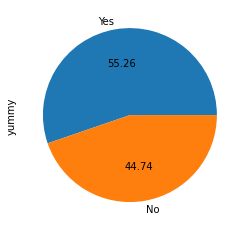

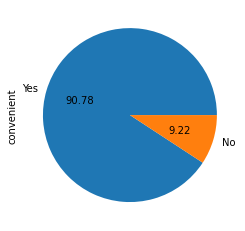

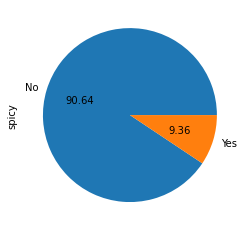

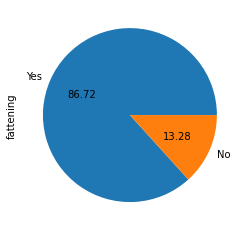

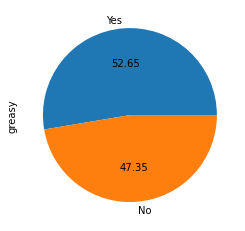

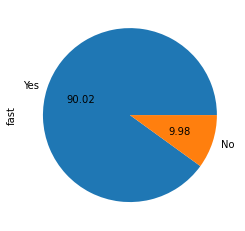

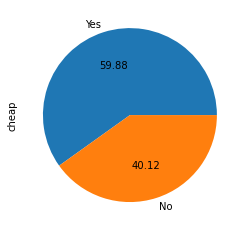

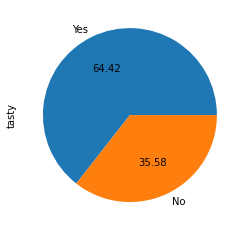

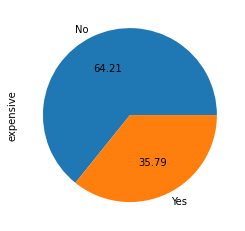

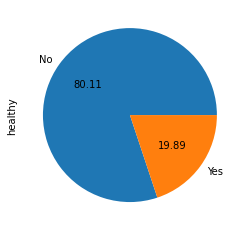

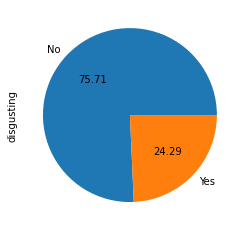

In [152]:
i=0
for i in range(11):
 df[variables[i]].value_counts().plot(kind='pie', autopct="%.2f")
 plt.show()

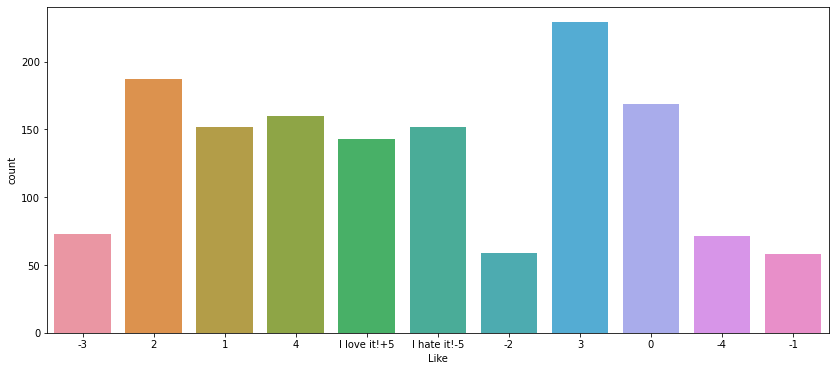

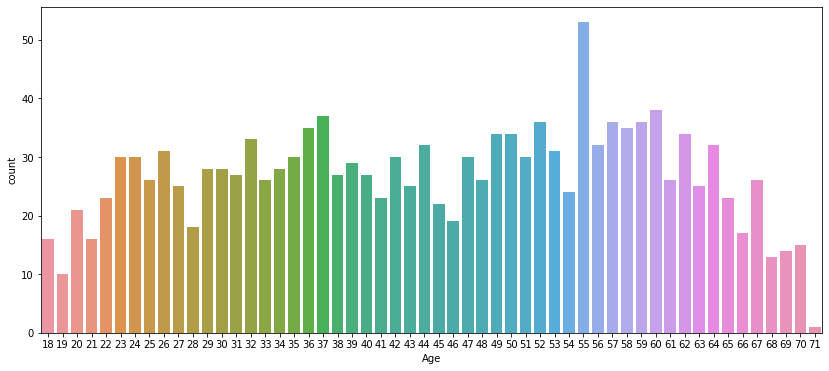

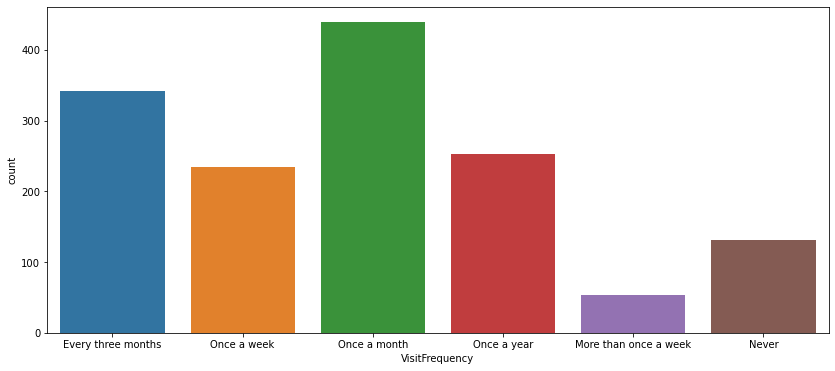

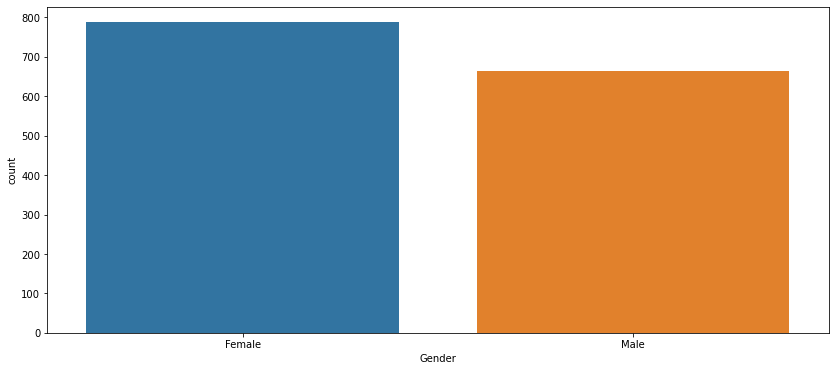

In [153]:
i=0
for i in range(4):
 fig,ax=plt.subplots(figsize=(14,6))
 sns.countplot(x=variables[i+11],data=df)

In [154]:
from sklearn.preprocessing import LabelEncoder
cols=['yummy','convenient','spicy','fattening','greasy','fast','cheap','tasty','expensive','healthy','disgusting','Gender']
le=LabelEncoder()
df[cols]=df[cols].apply(le.fit_transform)

In [155]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,0
1,1,1,0,1,1,1,1,1,1,0,0,2,51,Every three months,0
2,0,1,1,1,1,1,0,1,1,1,0,1,62,Every three months,0
3,1,1,0,1,1,1,1,1,0,0,1,4,69,Once a week,0
4,0,1,0,1,1,1,1,0,0,1,0,2,49,Once a month,1


In [156]:
le1=LabelEncoder()
df.loc[:,'Like']=pd.factorize(df['Like'])[0].reshape(-1,1)
df.loc[:,'VisitFrequency']=pd.factorize(df['VisitFrequency'])[0].reshape(-1,1)                                

In [157]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,0,61,0,0
1,1,1,0,1,1,1,1,1,1,0,0,1,51,0,0
2,0,1,1,1,1,1,0,1,1,1,0,2,62,0,0
3,1,1,0,1,1,1,1,1,0,0,1,3,69,1,0
4,0,1,0,1,1,1,1,0,0,1,0,1,49,2,1


<AxesSubplot:>

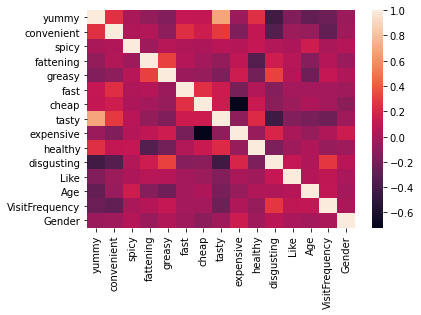

In [158]:
corr=df.corr()
sns.heatmap(corr)

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   yummy           1453 non-null   int32
 1   convenient      1453 non-null   int32
 2   spicy           1453 non-null   int32
 3   fattening       1453 non-null   int32
 4   greasy          1453 non-null   int32
 5   fast            1453 non-null   int32
 6   cheap           1453 non-null   int32
 7   tasty           1453 non-null   int32
 8   expensive       1453 non-null   int32
 9   healthy         1453 non-null   int32
 10  disgusting      1453 non-null   int32
 11  Like            1453 non-null   int64
 12  Age             1453 non-null   int64
 13  VisitFrequency  1453 non-null   int64
 14  Gender          1453 non-null   int32
dtypes: int32(12), int64(3)
memory usage: 102.3 KB


In [160]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x=sc.fit_transform(df)
newdf=pd.DataFrame(x,columns=df.columns)



In [161]:
newdf.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.811321,0.0,0.0
1,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.1,0.622642,0.0,0.0
2,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.2,0.830189,0.0,0.0
3,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.3,0.962264,0.2,0.0
4,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.1,0.584906,0.4,1.0


In [173]:
def  plotseg(consumers,y,labels):
    plt.scatter(consumers[y==0,0],consumers[y==0,1],s=10,c='yellow',label='cluser1')
    plt.scatter(consumers[y==1,0],consumers[y==1,1],s=10,c='red',label='cluser2')
    plt.scatter(consumers[y==2,0],consumers[y==2,1],s=10,c='violet',label='cluser3')
    plt.scatter(consumers[y==3,0],consumers[y==3,1],s=10,c='blue',label='cluser4')
    plt.title('customer segments')
    plt.xlabel(labels[0])
    plt.xlabel(labels[1])
    plt.xlabel(labels[2])
    plt.xlabel(labels[4])
    plt.show()

In [174]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4)
kmeans.fit(newdf)


KMeans(n_clusters=4)

In [175]:
consumers=newdf.iloc[4:12,:]

In [176]:
consumers

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
4,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.1,0.584906,0.4,1.0
5,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.1,0.698113,0.0,1.0
6,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.1,0.716981,0.0,0.0
7,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.4,0.094340,0.2,0.0
8,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.5,0.754717,0.6,1.0
9,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.2,0.264151,0.0,0.0
10,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.6,0.660377,0.0,0.0
11,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.7,0.188679,0.4,1.0


In [177]:
y=kmeans.predict(consumers)

In [178]:
y

array([1, 3, 0, 3, 2, 0, 1, 0])

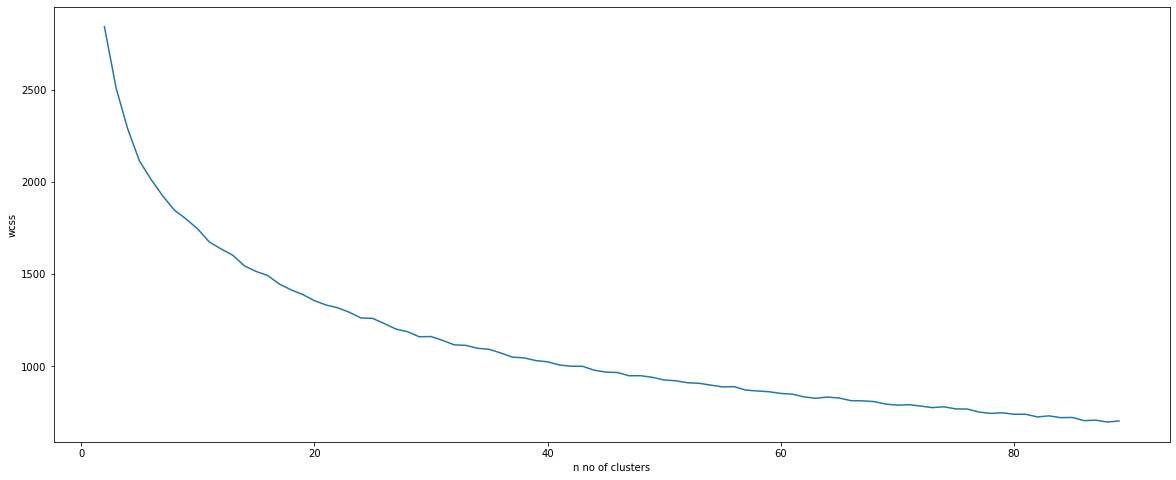

In [170]:
wcss=[]
nclus = range(2,90)
for k in nclus:
 kmeans=KMeans(n_clusters=k)
 kmeans.fit(newdf)
 wcss.append(kmeans.inertia_)
plt.figure(figsize=(20,8))
plt.plot(nclus,wcss)
plt.xlabel("n no of clusters")
plt.ylabel("wcss")
plt.show()
